## Decision Tree and Linear Regression Model on ALL Italian Restaurant

#### Read Italian Restaurant Dataframe for model prediction

In [46]:
df = pd.read_pickle("./italian_review_551.pkl")
df

,alias,categories,coordinates,display_phone,distance,id,image_url,is_closed,location,name,...,delivery,restaurant_reservation,dist_group,italian,label,old_date,new_date_review_rate,new_date,review,avg_rate
9,babbalucci-new-york,[italian],"{'latitude': 40.80894, 'longitude': -73.94496}",(646) 918-6572,531.822111,gyWc5qJRvu26LVQIShdR4Q,https://s3-media1.fl.yelpcdn.com/bphoto/3MOwPG...,False,"{'address1': '331 Lenox Ave', 'address2': '', ...",Babbalucci,...,True,False,0-1000m,True,1,2015-07-04,"(2019-04-06, I met a friend at this restaurant...",2019-04-06,I met a friend at this restaurant on a first d...,3.920792
10,pisticci-new-york,"[italian, breakfast_brunch]","{'latitude': 40.8141624, 'longitude': -73.960288}",(212) 932-3500,1140.188943,wZkZmjZEJDraLJgAalnHvA,https://s3-media1.fl.yelpcdn.com/bphoto/ERoh_M...,False,"{'address1': '125 La Salle St', 'address2': ''...",Pisticci,...,True,True,1000-2000m,True,1,2006-01-24,"(2019-04-09, Awesome food, delicious wines, ex...",2019-04-09,"Awesome food, delicious wines, excellent servi...",4.210526
15,vinatería-new-york-4,"[italian, spanish, seafood]","{'latitude': 40.8064392068585, 'longitude': -7...",(212) 662-8462,999.363229,MH08_pIRKsUSwfkVYxUE7w,https://s3-media2.fl.yelpcdn.com/bphoto/ZuDNNI...,False,"{'address1': '2211 Frederick Douglass Blvd', '...",VINATERÍA,...,False,False,0-1000m,True,1,2013-04-17,"(2019-04-15, Let me start off by saying that t...",2019-04-15,Let me start off by saying that the food was g...,3.465347
24,sottocasa-pizzeria-harlem-new-york,"[pizza, italian]","{'latitude': 40.805587, 'longitude': -73.947547}",(646) 928-4870,888.573617,NPnWsPxOpG91GHx74S27Uw,https://s3-media1.fl.yelpcdn.com/bphoto/jttl7I...,False,"{'address1': '227 Lenox Ave', 'address2': '', ...",Sottocasa Pizzeria - Harlem,...,False,False,0-1000m,True,1,2016-04-14,"(2019-04-13, This place was amazing!! Neapolit...",2019-04-13,This place was amazing!! Neapolitan pizza tend...,4.544643
27,grazie-new-york-3,[italian],"{'latitude': 40.77948, 'longitude': -73.9601}",(212) 717-4407,3951.457366,_3QRn51W3IoqBzc9fYet4Q,https://s3-media1.fl.yelpcdn.com/bphoto/IIbqHx...,False,"{'address1': '26 E 84th St', 'address2': '', '...",Grazie,...,True,True,3000-4000m,True,1,2006-01-13,"(2019-04-15, I was under the impressions based...",2019-04-15,I was under the impressions based on reviews h...,4.000000
35,lido-new-york,"[italian, breakfast_brunch, cocktailbars]","{'latitude': 40.8049797781916, 'longitude': -7...",(646) 490-8575,1170.550549,J9xVQScnr0lYWl61_mLXMA,https://s3-media4.fl.yelpcdn.com/bphoto/nlJAMT...,False,"{'address1': '2168 Frederick Douglass Blvd', '...",Lido,...,True,False,1000-2000m,True,1,2011-02-14,"(2019-04-14, I visited this location yesterday...",2019-04-14,I visited this location yesterday for brunch a...,4.190909
42,fumo-pizza-bar-pasta-new-york-3,"[pizza, italian, bars]","{'latitude': 40.821442, 'longitude': -73.9506357}",(646) 692-6675,937.057594,V6e4UBjFzdrcUgKbJTrZpA,https://s3-media3.fl.yelpcdn.com/bphoto/P0peGT...,False,"{'address1': '1600 Amsterdam Ave', 'address2':...",Fumo Pizza-Bar-Pasta,...,True,False,0-1000m,True,4,2016-03-05,"(2019-04-16, Fumo is one of those classic lunc...",2019-04-16,Fumo is one of those classic lunch spots for m...,4.196429
51,max-soha-new-york,[italian],"{'latitude': 40.811302, 'longitude': -73.958183}",(212) 531-2221,993.502933,vZ5-JXlJS75k8wmPNS5U5w,https://s3-media1.fl.yelpcdn.com/bphoto/BNvCZH...,False,"{'address1': '1274 Amsterdam Ave', 'address2':...",Max Soha,...,True,False,0-1000m,True,1,2005-11-09,"(2019-04-06, My wife and I had a wonderful mea...",2019-04-06,My wife and I had a wonderful meal at Max Soha...,4.208696
61,raos-new-york,[italian],"{'latitude': 40.79392, 'longitude': -73.93427}",(212) 722-6709,2416.414975,zo4JHfD2nWPUiqgsgDOaHQ,https://s3-media2.fl.yelpcdn.com/bphoto/3orQwP...,False,"{'address1': '455 E 114th St', 'address2': Non...",Rao's,...,False,False,2000-3000m,True,1,2006-05-12,"(2019-02-22, In years of yore, Italians had th..."

In [47]:
# Clean data for regression model
df = df.reset_index(drop=True)
#----------------------------------------------------
# Extract all category tags for italian restaurants
def get_cat(df):
    N = len(df)
    italian_cat = []
    for i in range(N):
        italian_cat.extend(df.categories[i])
    italian_cat_set = set(italian_cat)
    return italian_cat_set

#----------------------------------------------------
# Make each tag a column and add to df
italian_cat_set = get_cat(df)
italian_cat_set.remove('italian')
for i in italian_cat_set:
    df[str(i)]=[(str(i) in df.categories[j])*1 for j in range(len(df))]

In [48]:
# Create a new df only with all categories
index = list(df.index.unique().values)
columns = list(italian_cat_set)
df_new = pd.DataFrame(index=index, columns=columns)

# Add tag columns to df_new to fit linear model
df_new['rating'] = df['rating']
df_new['alias'] = df['alias']
df_new['price_num'] = df['price_num']
df_new['pickup'] = df['pickup']*1
df_new['delivery'] = df['delivery']*1
df_new['restaurant_reservation'] = df['restaurant_reservation']*1

for i in italian_cat_set:    
    df_new[str(i)]=df[str(i)]

In [49]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 551 entries, 0 to 550
Data columns (total 58 columns):
argentine                 551 non-null int64
seafood                   551 non-null int64
wraps                     551 non-null int64
southern                  551 non-null int64
coffee                    551 non-null int64
steak                     551 non-null int64
cocktailbars              551 non-null int64
tapas                     551 non-null int64
catering                  551 non-null int64
popupshops                551 non-null int64
bakeries                  551 non-null int64
cheese                    551 non-null int64
hotdogs                   551 non-null int64
beerbar                   551 non-null int64
diners                    551 non-null int64
salad                     551 non-null int64
mexican                   551 non-null int64
kosher                    551 non-null int64
hookah_bars               551 non-null int64
delis                     551 non-null i

#### To combine with sentiment df

In [72]:
sentiment = pd.read_pickle("./sentiment.pkl")

In [73]:
sentiment.rename(columns={'Restaurant':'alias'}, inplace=True)

In [74]:
sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 514 entries, 0 to 513
Data columns (total 11 columns):
alias           514 non-null object
Fear            514 non-null object
Trust           514 non-null object
Negative        514 non-null object
Positive        514 non-null object
Joy             514 non-null object
Disgust         514 non-null object
Anticipation    514 non-null object
Sadness         514 non-null object
Surprise        514 non-null object
avg_rate        514 non-null float64
dtypes: float64(1), object(10)
memory usage: 44.2+ KB


#### Merge 2 dataframe

In [82]:
result = pd.concat([df_new, sentiment], axis=1, sort=False)

In [83]:
# Drop the columns non-needed for model prediction
result = result.dropna()
result = result.drop(columns=['alias','rating'])

### Decision Tree on Tags, Service Type, and Sentiment Summary

In [113]:
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score

In [129]:
# Try Decision Tree
Y = result['avg_rate']
X = result.drop(columns=['avg_rate'])
clf = tree.DecisionTreeRegressor(min_samples_leaf=25)
clf = clf.fit(X, Y)

In [132]:
print('Model R^2',clf.score(X,Y))

Model R^2 0.49327235887565335


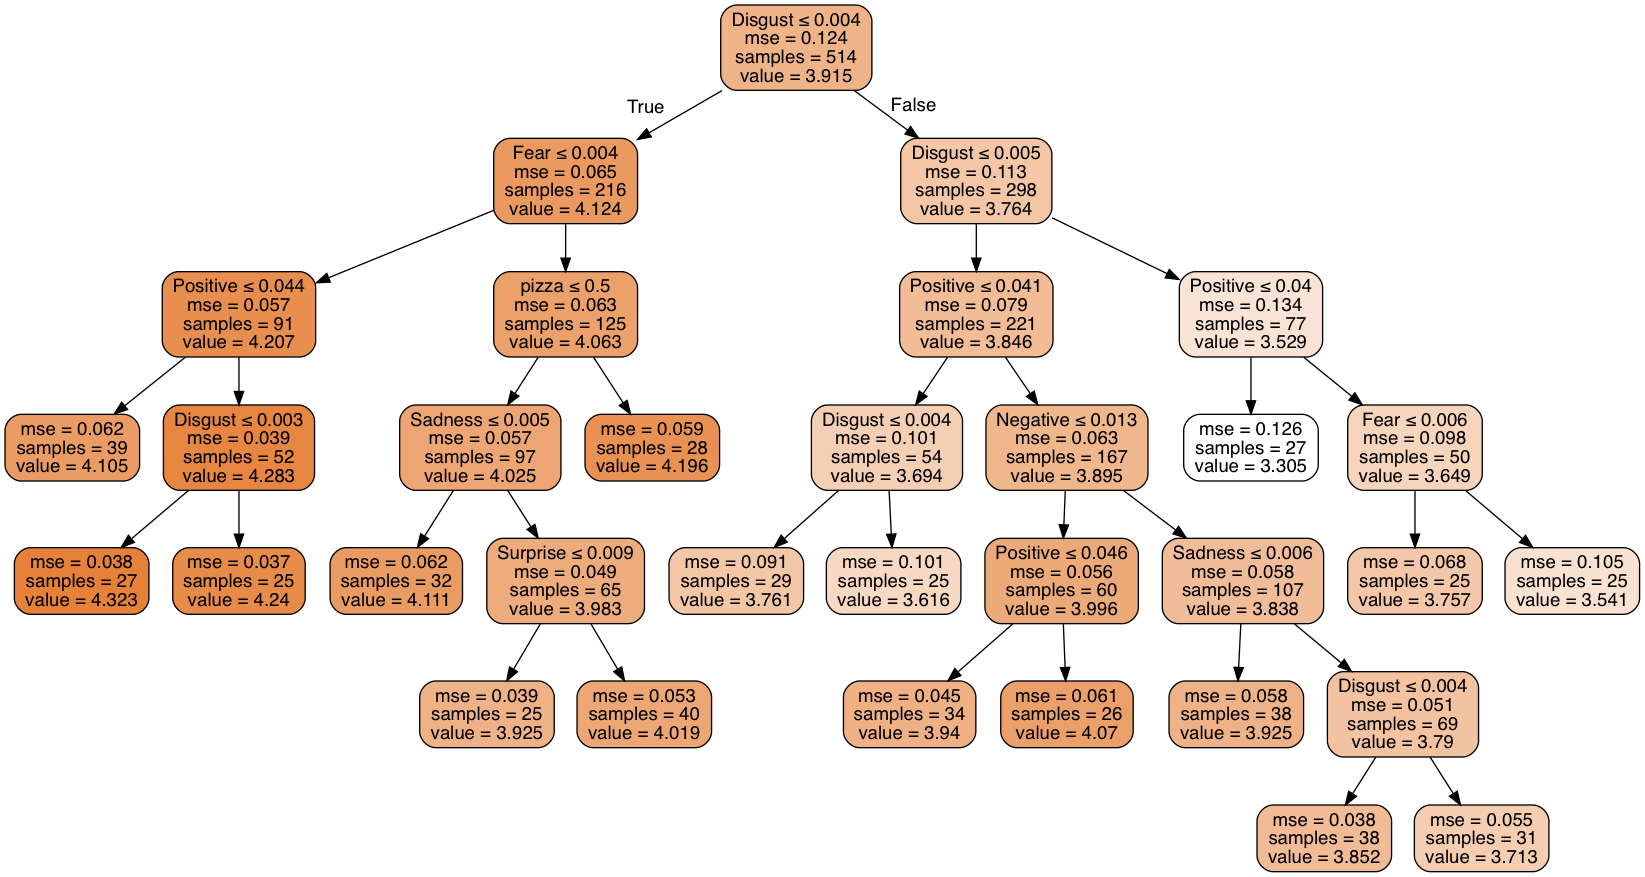

In [131]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, feature_names=X.columns.values,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Linear Regression on Tags, Service type, and Sentiment Summary

In [79]:
Y = result['avg_rate']
X = result.drop(columns=['avg_rate'])
X1 = sm.add_constant(X)
sm_model = sm.OLS(Y.astype(float),X1.astype(float))
output = sm_model.fit()
parameter = output.params[1:]
pvalue = output.pvalues[1:]

In [80]:
output.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               avg_rate   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.420
Method:                 Least Squares   F-statistic:                     7.091
Date:                Tue, 23 Apr 2019   Prob (F-statistic):           3.88e-37
Time:                        22:21:13   Log-Likelihood:                -21.257
No. Observations:                 514   AIC:                             166.5
Df Residuals:                     452   BIC:                             429.5
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      3.9655      0.205     19.377      0.000       3.563       4.368
argentine                  0.0985      0.338      0.292      0.771      -0.565       0.762
seafood                   -0.0787      0.066     -1.184      0.237      -0.209       0.052
wraps                  -3.272e-13   1.22e-13     -2.690      0.007   -5.66e-13   -8.82e-14
southern                  -0.1587      0.274     -0.580      0.562      -0.697       0.379
coffee                    -0.0445      0.130     -0.343      0.732      -0.299       0.211
steak                     -0.0520      0.114     -0.455      0.649      -0.276       0.172
cocktailbars               0.0063      0.054      0.116      0.907      -0.099       0.112
tapas                      0.3085      0.160      1.926      0.055      -0.006       0.623
catering                   0.0141      0.117      0.121      0.904      -0.216       0.244
popupshops                 0.2287      0.273      0.838      0.402      -0.307       0.765
bakeries                  -0.5042      0.283     -1.785      0.075      -1.059       0.051
cheese                     0.1792      0.273      0.657      0.511      -0.357       0.715
hotdogs                    0.4633      0.281      1.649      0.100      -0.089       1.015
beerbar                   -0.1109      0.158     -0.703      0.483      -0.421       0.199
diners                    -0.0256      0.275     -0.093      0.926      -0.566       0.515
salad                      0.0222      0.072      0.307      0.759      -0.120       0.164
mexican                -8.796e-14   7.35e-14     -1.197      0.232   -2.32e-13    5.65e-14
kosher                  1.273e-12   1.68e-13      7.596      0.000    9.44e-13     1.6e-12
hookah_bars                0.3235      0.287      1.126      0.261      -0.241       0.888
delis                      0.0285      0.199      0.143      0.886      -0.363       0.420
sandwiches                 0.0127      0.088      0.145      0.885      -0.159       0.185
venues                     0.0144      0.091      0.158      0.874      -0.164       0.193
mediterranean              0.0544      0.097      0.559      0.577      -0.137       0.246
foodstands                 0.5156      0.299      1.722      0.086      -0.073       1.104
comfortfood               -0.1473      0.275     -0.535      0.593      -0.688       0.394
pizza                      0.0280      0.032      0.890      0.374      -0.034       0.090
caribbean               2.857e-14   7.22e-14      0.396      0.692   -1.13e-13     1.7e-13
tradamerican               0.0561      0.114      0.493      0.622      -0.167       0.279
vegetarian                -0.3081      0.279     -1.104      0.270      -0.856       0.240
cafes                     -0.1976      0.279     -0.708      0.480      -0.747  

### Extract only varaibles that are significant (alpha = 0.1), along with their coefficients and p-values

In [159]:
name = list(X.columns.values[pvalue<0.1])
coef = list(parameter[pvalue<0.1])
pscore = list(pvalue[pvalue<0.1])
significant = []
for i in range(len(name)):
    significant.append((name[i],coef[i],pscore[i]))
significant

[('wraps', -3.2724378612062795e-13, 0.0074092354703722135),
 ('tapas', 0.30852520934120464, 0.05478522359402073),
 ('bakeries', -0.5042102651227074, 0.07500396098024341),
 ('hotdogs', 0.46330720479290655, 0.09976966809713905),
 ('kosher', 1.2729318783318338e-12, 1.7667522691333631e-13),
 ('foodstands', 0.5155952824692527, 0.08569277697495305),
 ('burgers', -0.45662139744567565, 0.09488913349050702),
 ('breakfast_brunch', -0.09738978661305292, 0.08812588158926372),
 ('restaurant_reservation', 0.09283058394630389, 0.02704938151819555),
 ('Fear', -28.35236695422921, 0.0010884207987270163),
 ('Trust', -15.906993112263915, 0.033206268102079994),
 ('Positive', 16.07099480870112, 0.006538664529124013),
 ('Joy', 16.343846693009638, 0.05991157951280677),
 ('Disgust', -118.19905205073317, 1.0138873522424987e-12),
 ('Sadness', -41.312998851880835, 0.0009807889044814353),
 ('Surprise', 19.491151821171954, 0.09787374302222909)]